<a href="https://colab.research.google.com/github/raulc66/AI-Learning/blob/main/CNN_for_Predicting_Bank_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Importing the libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2 : Importing the dataset from Kaggle

In [3]:
# installing the Kaggle API
! pip install -q kaggle

In [4]:
# creating a directory as kaggle
! mkdir -p ~/.kaggle

In [5]:
# import Kaggle APi to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [7]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [8]:
# list of the downloadable datasets
! kaggle datasets list

ref                                                                   title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                              Car Price Dataset                                 135KB  2025-01-26 19:53:28          19564        312  1.0              
abdulmalik1518/mobiles-dataset-2025                                   Mobiles Dataset (2025)                             20KB  2025-02-18 06:50:24           3512         67  1.0              
mahmoudelhemaly/students-grading-dataset                              Student Performance & Behavior Dataset            508KB  2025-02-17 17:38:46           3018         57  1.0              
himelsarder/coffee-shop-daily-revenue-pr

In [9]:
# importing dataset from kaggle
! kaggle competitions download -c santander-customer-satisfaction

 85% 7.00M/8.25M [00:00<00:00, 63.0MB/s]
100% 8.25M/8.25M [00:00<00:00, 70.5MB/s]


In [10]:
# unzip dataset
! unzip '/content/santander-customer-satisfaction.zip'

Archive:  /content/santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
dataset = pd.read_csv('/content/train.csv')

In [12]:
dataset.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# Step 3 : Data Preprocessing

In [13]:
dataset.shape

(76020, 371)

In [14]:
# independent variables (Matrix of features)
x = dataset.drop(labels = ['ID','TARGET'], axis = 1) # drop the columns which are not correlated with the output  | axis = 1 --> selecting the columns

In [15]:
# dependent variables
y = dataset['TARGET']

In [16]:
x.shape , y.shape

((76020, 369), (76020,))

In [17]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state = 0)

In [18]:
x_train.shape , x_test.shape

((60816, 369), (15204, 369))

In [19]:
y_train.shape , y_test.shape

((60816,), (15204,))

# Step 4 : Remove constant, Quasi constant and duplicate features (identical values, few non-identical values inside the columns and duplicate columns)

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [21]:
rm_f = VarianceThreshold(threshold=0.01) # removing the columns which have a variance less than 1%
x_train = rm_f.fit_transform(x_train)
x_test = rm_f.transform(x_test)

In [22]:
x_train.shape, x_test.shape

((60816, 266), (15204, 266))

In [23]:
# remove duplicate features
x_train_t = x_train.T # transpose method
x_test_t = x_test.T

In [24]:
x_train_t = pd.DataFrame(x_train_t)
x_test_t = pd.DataFrame(x_test_t)

In [25]:
x_train_t.shape, x_test_t.shape

((266, 60816), (266, 15204))

In [26]:
# number of duplicate features
x_train_t.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
261,False
262,False
263,False
264,False


In [27]:
x_train_t.duplicated().sum()

16

In [28]:
duplicated_features = x_train_t.duplicated()
print(duplicated_features) # True for duplicate , False otherwise

0      False
1      False
2      False
3      False
4      False
       ...  
261    False
262    False
263    False
264    False
265    False
Length: 266, dtype: bool


In [29]:
features_to_keep = [not index for index in duplicated_features] # converting the False values into True
print(features_to_keep)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, 

In [30]:
x_train = x_train_t[features_to_keep].T
x_test = x_test_t[features_to_keep].T

In [31]:
x_train.shape, x_test.shape

((60816, 250), (15204, 250))

In [32]:
266 - 250 # removed duplicated features

16

In [33]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
x_train

array([[ 0.03826438, -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.07271318],
       [ 0.03826438, -0.63569505, -0.05257837, ..., -0.01895685,
        -0.01990642,  0.73001879],
       [ 0.03826438,  0.51624549, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.0591358 ],
       ...,
       [ 0.0384475 , -0.78928712, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.27045009],
       [ 0.03826438, -0.25171487, -0.01644412, ..., -0.01895685,
        -0.01990642, -0.28583665],
       [ 0.03826438,  1.66818604, -0.05257837, ..., -0.01895685,
        -0.01990642, -0.23183104]])

In [35]:
x_train.shape, x_test.shape # 1-dimension , convert to 2-dimensions

((60816, 250), (15204, 250))

In [36]:
x_train = x_train.reshape(60816, 250, 1)

In [37]:
x_test = x_test.reshape(15204, 250, 1)

In [38]:
x_train.shape, x_test.shape

((60816, 250, 1), (15204, 250, 1))

In [39]:
y_train = y_train.to_numpy()

In [40]:
y_test = y_test.to_numpy()

# Step 5 : Building the model

In [41]:
 # define an object
model = tf.keras.models.Sequential()

In [42]:
# Adding the first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(250,1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer

model.add(tf.keras.layers.MaxPool1D(pool_size = 2))

# dropout layer

model.add(tf.keras.layers.Dropout(0.3))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Adding the second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer

model.add(tf.keras.layers.MaxPool1D(pool_size = 2))

# dropout layer

model.add(tf.keras.layers.Dropout(0.5))


In [44]:
# Adding the third CNN layer
model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer

model.add(tf.keras.layers.MaxPool1D(pool_size = 2))

# dropout layer

model.add(tf.keras.layers.Dropout(0.5))


In [45]:
# flatten layer

model.add(tf.keras.layers.Flatten())

In [46]:
# add the fully connected layer / dense

# first dense layer
model.add(tf.keras.layers.Dense(units = 256, activation='relu'))

# dropout layer

model.add(tf.keras.layers.Dropout(0.5))



In [47]:
# output layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 248, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 248, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 124, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 124, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 122, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 122, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 61, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 61, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 59, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 59, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 29, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 29, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3712)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         950,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 982,721 (3.75 MB)

 Trainable params: 982,273 (3.75 MB)

 Non-trainable params: 448 (1.75 KB)

In [49]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.00005)

In [50]:
# compile the model
model.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 6 : Training the model

In [51]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.9166 - loss: 0.3630 - val_accuracy: 0.9580 - val_loss: 0.1809
Epoch 2/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.9598 - loss: 0.1781 - val_accuracy: 0.9577 - val_loss: 0.1810
Epoch 3/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9603 - loss: 0.1682 - val_accuracy: 0.9582 - val_loss: 0.1807
Epoch 4/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9623 - loss: 0.1573 - val_accuracy: 0.9582 - val_loss: 0.1747
Epoch 5/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9604 - loss: 0.1628 - val_accuracy: 0.9582 - val_loss: 0.1719
Epoch 6/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9607 - loss: 0.1575 - val_accuracy: 0.9583 - val_loss: 0.1708
Epoch 7/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9628 - loss: 0.1504 - val_accuracy: 0.9583 - val_loss: 0.1717
Epoch 8/10
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9605 - loss: 0

In [52]:
y_pred = (model.predict(x_test) > 0.5).astype(int)

476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [56]:
print(y_pred[12]), print(y_test[12])

[0]
0


(None, None)

In [57]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14570     0]
 [  634     0]]


In [58]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9583004472507235


# Step 7 : Learning Curve

In [59]:
def learning_curve(history, epoch):
  # training versus validation accuracy
  epoch_range = range(1, epoch +1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy ')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()



  # training versus validation loss

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','val'], loc= 'upper left')
  plt.show()

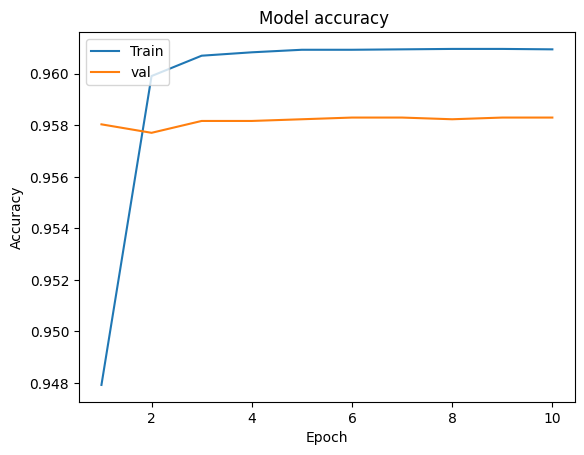

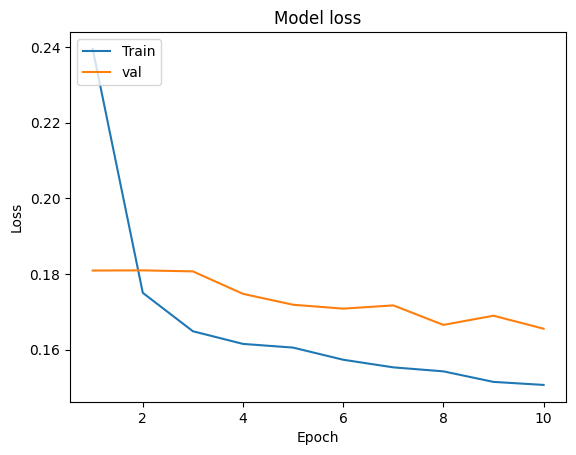

In [60]:
learning_curve(history, 10)